# Classification Practice

In [53]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# I made something for y'all

def eval_classification(model, model_name,
                        X_tr, X_te, y_tr, y_te,
                        to_print=False):
    '''
    Finds predictions for train and test sets, then
    prints metrics for classification nicely

    Inputs:
    model : already-fit sklearn model
    model_name : string, name for index for output df
    X_tr : training X (can be scaled, that's fine)
    X_te : testing X
    y_tr : training target
    y_te : testing target
    to_print : boolean, will print output nicely if True

    Outputs:
    metric_df - pandas Dataframe showing output
    '''
    
    metrics = {"Accuracy": accuracy_score,
               "Recall": recall_score,
               "Precision": precision_score,
               "F1-Score": f1_score}

    y_pred_tr = model.predict(X_tr)
    y_pred_te = model.predict(X_te)

    # Defining the column names based on the metric dict keys
    col_list = []  # Starting a list
    for name in metrics.keys():
        col_list.append(f"{name.lower()}_train")
        col_list.append(f"{name.lower()}_test")

    metric_df = pd.DataFrame(columns=col_list)

    for name, metric_function in metrics.items():
        tr_col = f"{name.lower()}_train"
        metric_df.at[model_name, tr_col] = metric_function(y_tr, y_pred_tr)
        te_col = f"{name.lower()}_test"
        metric_df.at[model_name, te_col] = metric_function(y_te, y_pred_te)
        
        # Adding to-print option to print the metrics nicely
        if to_print:
            print(f"{name}:"); print("="*len(name))
            print(f"TRAIN: {metric_function(y_tr, y_pred_tr):.4f}")
            print(f"TEST: {metric_function(y_te, y_pred_te):.4f}")
            print("*" * 15)
    
    return metric_df

In [55]:
# Data import
df = pd.read_csv('data/baseball_height_weight.csv')

In [56]:
df.head()

,name,team,position,height_in,weight_lb,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [57]:
df['position'].value_counts()

Relief_Pitcher       314
Starting_Pitcher     220
Outfielder           194
Catcher               76
Second_Baseman        58
First_Baseman         55
Shortstop             52
Third_Baseman         45
Designated_Hitter     18
Name: position, dtype: int64

## Problem Definition

I'm curious whether there are definitive differences between types of baseball players in terms of their physical attributes. Let's see if we can define a model that can predict whether a player is a pitcher or not.

In [58]:
# Defining our target
df['pitcher'] = np.where(df['position'].str.contains("_Pitcher"), 1, 0)

In [59]:
df['pitcher'].value_counts()

1    534
0    498
Name: pitcher, dtype: int64

In [60]:
# baseline accuracy (if we always predicted pitcher)

len(df[df['pitcher'] == 1]) / len(df)

0.5174418604651163

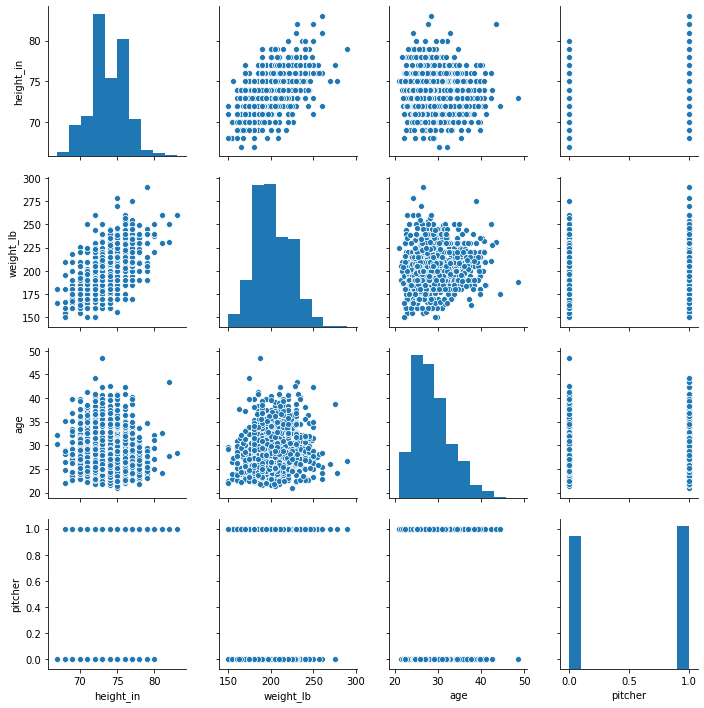

In [61]:
sns.pairplot(df)

In [62]:
df.describe()

,height_in,weight_lb,age,pitcher
count,1032.000000,1032.000000,1032.000000,1032.000000
mean,73.697674,201.671512,28.734157,0.517442
std,2.307092,20.993917,4.322937,0.499938
min,67.000000,150.000000,20.900000,0.000000
25%,72.000000,187.000000,25.437500,0.000000
50%,74.000000,200.000000,27.925000,1.000000
75%,75.000000,215.000000,31.217500,1.000000
max,83.000000,290.000000,48.520000,1.000000


## Modeling

#### Model 1: Vanilla Logistic Regression

In [71]:
# Defining our X and y
X = df[['height_in', 'weight_lb', 'age']]
y = df['pitcher']

In [77]:
X.describe()

,height_in,weight_lb,age
count,1032.000000,1032.000000,1032.000000
mean,73.697674,201.671512,28.734157
std,2.307092,20.993917,4.322937
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.437500
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.217500
max,83.000000,290.000000,48.520000


In [73]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [76]:
X_train.describe()

,height_in,weight_lb,age
count,691.000000,691.000000,691.000000
mean,73.683068,202.112880,28.806093
std,2.298579,20.899247,4.316652
min,67.000000,150.000000,21.460000
25%,72.000000,188.000000,25.560000
50%,74.000000,200.000000,28.060000
75%,75.000000,215.500000,31.280000
max,83.000000,290.000000,48.520000


In [85]:
X_test.describe()

,height_in,weight_lb,age
count,341.000000,341.000000,341.000000
mean,73.727273,200.777126,28.588387
std,2.327354,21.187056,4.338329
min,67.000000,150.000000,20.900000
25%,72.000000,185.000000,25.230000
50%,74.000000,200.000000,27.560000
75%,75.000000,215.000000,31.150000
max,80.000000,275.000000,44.280000


In [79]:
# Scaling our data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [84]:
pd.DataFrame(X_test_sc)

,0,1,2
0,-0.297385,-1.537670,0.575841
1,-1.603484,-0.580004,0.816943
2,-0.297385,-0.101172,0.689437
3,-1.168118,0.856494,0.881855
4,1.008715,0.138245,-0.407113
...,...,...,...
336,-1.168118,-1.058837,2.156914
337,-0.732751,-1.537670,-1.322837
338,-0.297385,-0.340588,-1.088690
339,0.573348,1.239560,-0.024595


In [14]:
# Instantiating and fitting our first model
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Using our predefined function
logreg_scores = eval_classification(logreg, "logreg",
                                    X_train_sc, X_test_sc,
                                    y_train, y_test,
                                    to_print=True)

Accuracy:
TRAIN: 0.6498
TEST: 0.6481
***************
Recall:
TRAIN: 0.6919
TEST: 0.6723
***************
Precision:
TRAIN: 0.6517
TEST: 0.6575
***************
F1-Score:
TRAIN: 0.6712
TEST: 0.6648
***************


In [16]:
logreg_scores

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg,0.649783,0.648094,0.691877,0.672316,0.651715,0.657459,0.671196,0.664804


#### Model 2: Balanced Logistic Regression

In [17]:
logreg_2 = LogisticRegression(class_weight='balanced')
logreg_2.fit(X_train_sc, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
logreg_bal = eval_classification(logreg_2, "logreg_bal", 
                                 X_train_sc, X_test_sc, 
                                 y_train, y_test,
                                 to_print=True)

Accuracy:
TRAIN: 0.6585
TEST: 0.6422
***************
Recall:
TRAIN: 0.6555
TEST: 0.6384
***************
Precision:
TRAIN: 0.6744
TEST: 0.6608
***************
F1-Score:
TRAIN: 0.6648
TEST: 0.6494
***************


In [19]:
logreg_bal

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg_bal,0.658466,0.642229,0.655462,0.638418,0.674352,0.660819,0.664773,0.649425


In [20]:
# Now, because we have these as dataframes with the same colnames:
metrics = pd.concat([logreg_scores, logreg_bal])
metrics

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg,0.649783,0.648094,0.691877,0.672316,0.651715,0.657459,0.671196,0.664804
logreg_bal,0.658466,0.642229,0.655462,0.638418,0.674352,0.660819,0.664773,0.649425


In [22]:
metrics.loc[metrics['accuracy_test'] == metrics['accuracy_test'].max()]

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg,0.649783,0.648094,0.691877,0.672316,0.651715,0.657459,0.671196,0.664804


#### Model 3: KNN with K=3

In [23]:
# Instantiate and fit your model
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
# Evaluate
knn_results = eval_classification(knn, "knn_default",
                                  X_train_sc, X_test_sc,
                                  y_train, y_test,
                                  to_print=True)

Accuracy:
TRAIN: 0.7713
TEST: 0.6481
***************
Recall:
TRAIN: 0.7563
TEST: 0.6780
***************
Precision:
TRAIN: 0.7918
TEST: 0.6557
***************
F1-Score:
TRAIN: 0.7736
TEST: 0.6667
***************


In [25]:
knn_weight = KNeighborsClassifier(weights='distance')
knn_weight.fit(X_train_sc, y_train)
knn_w_results = eval_classification(knn_weight, "knn_dist",
                                    X_train_sc, X_test_sc,
                                    y_train, y_test,
                                    to_print=True)

Accuracy:
TRAIN: 0.9986
TEST: 0.6246
***************
Recall:
TRAIN: 0.9972
TEST: 0.6441
***************
Precision:
TRAIN: 1.0000
TEST: 0.6369
***************
F1-Score:
TRAIN: 0.9986
TEST: 0.6404
***************


In [26]:
metrics

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg,0.649783,0.648094,0.691877,0.672316,0.651715,0.657459,0.671196,0.664804
logreg_bal,0.658466,0.642229,0.655462,0.638418,0.674352,0.660819,0.664773,0.649425


In [28]:
list(range(1, 12, 2))

[1, 3, 5, 7, 9, 11]

In [29]:
# How can I compare KNN results to my earlier logreg?
for k in list(range(1, 12, 2)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    knn_results = eval_classification(knn, f"knn{k}",
                                      X_train_sc, X_test_sc,
                                      y_train, y_test)
    metrics = pd.concat([metrics, knn_results])

In [30]:
metrics

,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1-score_train,f1-score_test
logreg,0.649783,0.648094,0.691877,0.672316,0.651715,0.657459,0.671196,0.664804
logreg_bal,0.658466,0.642229,0.655462,0.638418,0.674352,0.660819,0.664773,0.649425
knn1,0.998553,0.548387,0.997199,0.564972,1,0.564972,0.998597,0.564972
knn3,0.793054,0.651026,0.80112,0.672316,0.798883,0.661111,0.8,0.666667
knn5,0.771346,0.648094,0.756303,0.677966,0.791789,0.655738,0.773639,0.666667
knn7,0.767004,0.633431,0.7507,0.644068,0.788235,0.647727,0.76901,0.645892
knn9,0.748191,0.630499,0.739496,0.655367,0.765217,0.640884,0.752137,0.648045
knn11,0.736614,0.639296,0.717087,0.661017,0.759644,0.65,0.737752,0.655462


## Evaluating

In [31]:
test_cols = [c for c in metrics.columns.to_list() if "test" in c]

In [32]:
metrics[test_cols]

,accuracy_test,recall_test,precision_test,f1-score_test
logreg,0.648094,0.672316,0.657459,0.664804
logreg_bal,0.642229,0.638418,0.660819,0.649425
knn1,0.548387,0.564972,0.564972,0.564972
knn3,0.651026,0.672316,0.661111,0.666667
knn5,0.648094,0.677966,0.655738,0.666667
knn7,0.633431,0.644068,0.647727,0.645892
knn9,0.630499,0.655367,0.640884,0.648045
knn11,0.639296,0.661017,0.65,0.655462


# Level Up: Multi-Class Classification

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
X = iris['data']
y = iris['target']

In [37]:
iris_df = pd.DataFrame(X, columns = iris['feature_names'])
iris_df['target'] = y

In [39]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
iris_df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
78,6.0,2.9,4.5,1.5,1
22,4.6,3.6,1.0,0.2,0
147,6.5,3.0,5.2,2.0,2
21,5.1,3.7,1.5,0.4,0
106,4.9,2.5,4.5,1.7,2
4,5.0,3.6,1.4,0.2,0
115,6.4,3.2,5.3,2.3,2
5,5.4,3.9,1.7,0.4,0
91,6.1,3.0,4.6,1.4,1
58,6.6,2.9,4.6,1.3,1


In [40]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [41]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Modeling

In [42]:
# New train test split, now for iris data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [43]:
# Still need to scale
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [44]:
# Instantiate and fit a KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluating: How do we evaluate a multi-class model?

https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel

In [45]:
print(f"Train: {knn.score(X_train_sc, y_train)}")
print(f"Test: {knn.score(X_test_sc, y_test)}")

Train: 0.98
Test: 0.92


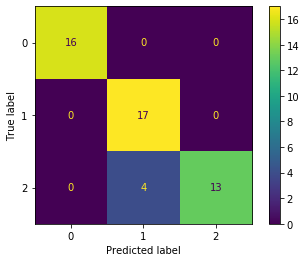

In [46]:
plot_confusion_matrix(knn, X_test_sc, y_test)

In [47]:
16+17+13

46

In [48]:
len(y_test)

50

In [49]:
46/50

0.92